# Linear Regression Model on Heating Oil Consumption and Cost

### Understanding the Data

This dataset provides monthly consumption and cost data for heating oil in New York City, broken down by borough and development. The data includes information on utility vendors and meters, making it possible to track trends over time

## Importing Needed Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data in

In [3]:
df = pd.read_csv("nyoilconsumption.csv")
#take a look at the dataset
df.head()

,index,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,...,Vendor Name,UMIS BILL ID,Revenue Month,Service Start Date,Service End Date,# days,Meter Number,Estimated,Current Charges,Consumption (GAL)
0,0,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897085,2010-01,12/24/2009,01/26/2010,33,395416152700002-OIL,N,303.47,148.0
1,1,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897086,2010-02,01/26/2010,02/25/2010,30,395416152700002-OIL,N,504.41,246.0
2,2,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897087,2010-03,02/25/2010,03/26/2010,29,395416152700002-OIL,N,200.94,98.0
3,3,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897088,2010-05,04/26/2010,05/24/2010,28,395416152700002-OIL,N,789.42,385.0
4,4,ADAMS,BRONX,ADAMS,NaN,Not Applicable,NaN,118,248,B011800,...,"S.J. Fuel Co., Inc.",2897089,2010-06,05/24/2010,06/23/2010,30,395416152700002-OIL,N,488.01,238.0


## Data Exploration

It is important to look at general statistics of our data.

In [4]:
df.describe()

,index,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (GAL)
count,14628.000000,14628.000000,14628.000000,1.462800e+04,14628.000000,1.462800e+04,14628.000000
mean,7313.500000,169.101859,376.915846,5.959984e+06,19.714247,1.644158e+04,8748.507085
std,4222.884204,131.235473,211.208734,2.415651e+06,19.532475,5.440348e+04,20132.605128
min,0.000000,1.000000,0.000000,2.896184e+06,0.000000,0.000000e+00,-21922.000000
25%,3656.750000,67.000000,241.000000,3.335241e+06,1.000000,1.311000e+01,101.000000
50%,7313.500000,142.000000,346.000000,5.386502e+06,29.000000,2.178835e+03,2702.000000
75%,10970.250000,245.000000,531.000000,8.363922e+06,30.000000,1.020933e+04,10002.000000
max,14627.000000,582.000000,843.000000,1.107917e+07,1096.000000,1.161553e+06,348318.000000


We can select a couple of key features of interest to take a closer look at.

In [24]:
cdf = df[['# days','Current Charges','Consumption (GAL)']]
cdf.drop(cdf[cdf['Current Charges'] == 0].index)
cdf.head()

,# days,Current Charges,Consumption (GAL)
0,33,303.47,148.0
1,30,504.41,246.0
2,29,200.94,98.0
3,28,789.42,385.0
4,30,488.01,238.0


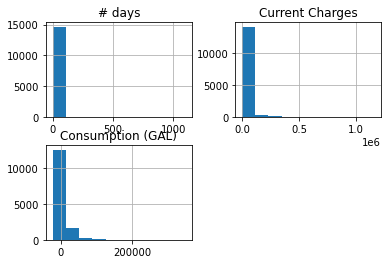

In [26]:
cdf.hist()
plt.show()

We can plot features against current charges to see if the relationship is linear.

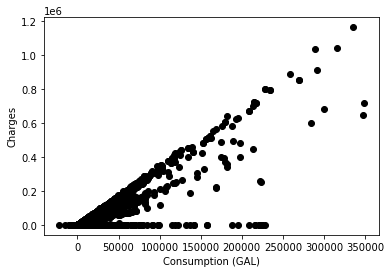

In [27]:
plt.scatter(cdf['Consumption (GAL)'],cdf['Current Charges'],color = 'black')
plt.xlabel('Consumption (GAL)')
plt.ylabel('Charges')
plt.show()

### Creating a train and test dataset

We can split our dataset into train and test sets, with 80% assigned to the training set and 20% to the test set. We can also select random rows using the np.random.rand() function

In [28]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Creating our Linear Regression Model

A linear regression model finds coefficients that minimze the sum of the squares of the residuals between true values and predicted values. 

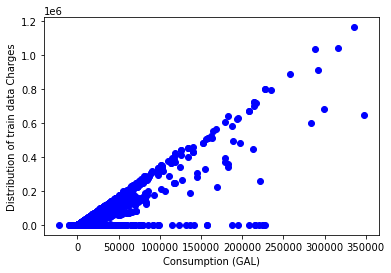

In [29]:
plt.scatter(train['Consumption (GAL)'],train['Current Charges'],color = 'blue')
plt.xlabel('Consumption (GAL)')
plt.ylabel('Distribution of train data Charges')
plt.show()

### Modeling

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Consumption (GAL)']])
train_y = np.asanyarray(train[['Current Charges']])
regr.fit(train_x,train_y)

#coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[2.31356067]]
Intercept: [-3872.25259542]


### Plot Outputs

Text(0, 0.5, 'Current Charges')

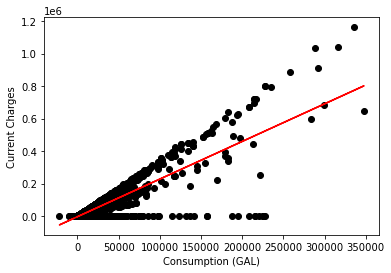

In [33]:
plt.scatter(train['Consumption (GAL)'], train['Current Charges'], color = 'black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("Consumption (GAL)")
plt.ylabel("Current Charges")


### Evaluation

In [35]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Consumption (GAL)']])
test_y = np.asanyarray(test[['Current Charges']])
test_y_ = regr.predict(test_x)

print("R2-score: %.2f" % r2_score(test_y, test_y_))

R2-score: 0.81
